In [1]:
import pandas as pd 
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR


In [2]:
df = pd.read_csv("train.csv")
pd.set_option("display.max_columns", None)

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hours'] = df['datetime'].dt.hour
df['years'] = df['datetime'].dt.year
df['week'] = df['datetime'].dt.weekday

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,years,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,2012,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,2012,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,2012,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,2012,2


In [6]:
df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'atemp'] = df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'temp'] 


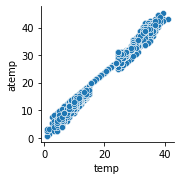

In [7]:
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

In [8]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
month         0
day           0
hours         0
years         0
week          0
dtype: int64

In [9]:
mask_night = (df['hours'] < 6) | (df['hours'] > 23)
df.loc[mask_night, 'part_of_day'] = 1

In [10]:
mask_morning = (df['hours']>5) & (df['hours'] < 13)
df.loc[mask_morning, 'part_of_day'] = 3

In [11]:
mask_afternoon = (df['hours']> 12) & (df['hours'] < 19)
df.loc[mask_afternoon, 'part_of_day'] = 4

In [12]:
mask_midnight = (df['hours']>18) & (df['hours'] <= 23)
df.loc[mask_midnight, 'part_of_day'] = 2

In [13]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,years,week,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,2011,5,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011,5,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,2011,5,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,2011,5,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,2011,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,2012,2,2.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,2012,2,2.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,2012,2,2.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,2012,2,2.0


In [14]:
mask_2012 = (df['datetime'].dt.year == 2012) 
df.loc[mask_2012 & (df['month']>7)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,years,week,part_of_day
8607,2012-08-01 00:00:00,3,0,1,1,27.88,31.820,79,11.0014,3,44,47,8,1,0,2012,2,1.0
8608,2012-08-01 01:00:00,3,0,1,1,27.06,30.305,83,6.0032,5,28,33,8,1,1,2012,2,1.0
8609,2012-08-01 02:00:00,3,0,1,1,26.24,28.790,83,7.0015,0,13,13,8,1,2,2012,2,1.0
8610,2012-08-01 03:00:00,3,0,1,1,26.24,28.790,83,7.0015,0,7,7,8,1,3,2012,2,1.0
8611,2012-08-01 04:00:00,3,0,1,2,26.24,29.545,78,8.9981,1,3,4,8,1,4,2012,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,2012,2,2.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,2012,2,2.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,2012,2,2.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,2012,2,2.0


In [15]:
df['difference_atemp_temp'] = df['atemp'] - df['temp']

In [16]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,years,week,part_of_day,difference_atemp_temp
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,2011,5,1.0,4.555
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011,5,1.0,4.615
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,2011,5,1.0,4.615
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,2011,5,1.0,4.555
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,2011,5,1.0,4.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,2012,2,2.0,4.115
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,2012,2,2.0,2.665
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,2012,2,2.0,1.970
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,2012,2,2.0,3.485


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, FunctionTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [18]:
mask_df_train= (df['datetime'] <= ('2012-8-19 23:00:00')) 
df_train = df.loc[mask_df_train]

In [19]:
mask_df_test= (df['datetime'] > ('2012-8-19 23:00:00')) 
df_test = df.loc[mask_df_test]

## split for model with target: count

In [20]:
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,years,week,part_of_day,difference_atemp_temp
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,2011,5,1.0,4.555
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011,5,1.0,4.615
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,2011,5,1.0,4.615
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,2011,5,1.0,4.555
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,2011,5,1.0,4.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,2012-08-19 19:00:00,3,0,0,2,26.24,30.305,73,8.9981,72,269,341,8,19,19,2012,6,2.0,4.065
9059,2012-08-19 20:00:00,3,0,0,2,26.24,30.305,73,12.9980,61,213,274,8,19,20,2012,6,2.0,4.065
9060,2012-08-19 21:00:00,3,0,0,3,25.42,29.545,78,6.0032,36,154,190,8,19,21,2012,6,2.0,4.125
9061,2012-08-19 22:00:00,3,0,0,2,25.42,29.545,78,11.0014,6,50,56,8,19,22,2012,6,2.0,4.125


In [21]:
X_train = df_train.drop(['count','datetime', 'casual', 'registered', 'season',  'day','atemp'], axis = 1)

X_test = df_test.drop(['count','datetime', 'casual', 'registered', 'season',  'day','atemp'], axis = 1)

y_train = df_train['count']
y_train_stand= RobustScaler().fit_transform(df_train[['count']])
y_test_stand = RobustScaler().fit_transform(df_test[['count']])
y_test = df_test['count']


creer des catego pour les heures (discrétiser)

In [22]:
y_test_stand

array([[-0.15660685],
       [-0.44698206],
       [-0.47960848],
       ...,
       [-0.15660685],
       [-0.28384992],
       [-0.41761827]])

In [23]:
continuous = ['holiday','workingday','weather',	'temp',	'humidity',	'windspeed','part_of_day','difference_atemp_temp']
log = FunctionTransformer(np.log1p)
preprocessor = make_column_transformer((RobustScaler(), continuous),remainder='passthrough')



In [24]:
X_train

,holiday,workingday,weather,temp,humidity,windspeed,month,hours,years,week,part_of_day,difference_atemp_temp
0,0,0,1,9.84,81,0.0000,1,0,2011,5,1.0,4.555
1,0,0,1,9.02,80,0.0000,1,1,2011,5,1.0,4.615
2,0,0,1,9.02,80,0.0000,1,2,2011,5,1.0,4.615
3,0,0,1,9.84,75,0.0000,1,3,2011,5,1.0,4.555
4,0,0,1,9.84,75,0.0000,1,4,2011,5,1.0,4.555
...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,2,26.24,73,8.9981,8,19,2012,6,2.0,4.065
9059,0,0,2,26.24,73,12.9980,8,20,2012,6,2.0,4.065
9060,0,0,3,25.42,78,6.0032,8,21,2012,6,2.0,4.125
9061,0,0,2,25.42,78,11.0014,8,22,2012,6,2.0,4.125


# grid search cv 

In [25]:
parameters = {'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}


features = preprocessor.fit_transform(X_train)
model = SVR()
gridsearch = GridSearchCV(model, param_grid = parameters, 
                      cv = 2, n_jobs = -1, verbose = 2)
gridsearch.fit(features, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [ ]:

# print best parameter after tuning
print(gridsearch.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(gridsearch.best_estimator_)

In [ ]:
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse
from sklearn.metrics import mean_absolute_error, mean_squared_error
# experiment_id = mlflow.create_experiment("velo")

In [ ]:
# experiment_id = mlflow.create_experiment("veloc_rf")

In [ ]:
with mlflow.start_run(experiment_id = 2):
    rf = RandomForestRegressor(warm_start=True, oob_score=True,
    min_impurity_decrease=0.001, max_features='auto', ccp_alpha=0.000001)

    model_forest = make_pipeline(preprocessor,rf)
    model_forest.fit(X_train, y_train)
    y_pred = model_forest.predict(X_test)

    score = model_forest.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # cross_val_score(model, X, y, cv=3)
    print(' r2: %s' % score)
    print(' mse: %s' % mse)
    print(' mae: %s' % mae)


    mlflow.log_metric("r2", score)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mae", mae)

    


In [ ]:
df.loc[(df['workingday']== 1 ), 'day'] = 'Working day'

In [ ]:
import pickle

In [ ]:
# with open('model_pickle.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [ ]:
from sklearn.model_selection import learning_curve
import lightgbm as lgbm

In [ ]:
X_train_lgb = df_train.drop(['count','datetime', 'casual', 'registered',
 'difference_atemp_temp', 'day', 'date',
  'month', 'season',
   'part_of_day', 'windspeed'], axis = 1)

X_test_lgb = df_test.drop(['count','datetime', 'casual', 'registered',
 'difference_atemp_temp', 'day', 'date',
  'month', 'season',
   'part_of_day', 'windspeed'], axis = 1)

y_train = df_train['count']

y_test = df_test['count']

In [ ]:
categorial = [ 'week', 'holiday','weather', 'workingday']
continuous = ['humidity',  'atemp','temp', 'hours']
preprocessor_lgb = make_column_transformer((OneHotEncoder(),categorial), remainder='passthrough')

In [ ]:
clf = lgbm.LGBMRegressor(
subsample= 0.9,
num_leaves= 80,
min_split_gain= 0.1,
max_depth= 40,
learning_rate= 0.1,
colsample_bytree= 1)
model_lgb = make_pipeline(preprocessor, clf)
model_lgb.fit(X_train, y_train)
model_lgb.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso, Ridge


In [ ]:
estimator = [('rf',rf),('lgbm', clf),('lasso', Lasso()), ('ridge', Ridge())]
reg = make_pipeline(preprocessor,StackingRegressor(estimators=estimator))

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
N, train_score, val_score = learning_curve(reg, X_train, y_train,train_sizes=np.linspace(0.1,1.0,10),scoring='r2' ,cv=5, random_state=1)

print(N)
plt.rcParams["figure.figsize"]=[16,9]
fig = plt.figure()
fig.patch.set_facecolor('blue')
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
X_train